# Fig2.B

In [3]:
import sys,os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# set the path to the root directory of the git
path_root = r'C:/Users/miln/tubCloud/Work-in-progress/main-project/new_git'

# enable python to find the modules
sys.path.append(path_root)

from Utils.preproc_utils import import_csv_w_wkt_to_gdf

In [4]:
path = os.path.join('E:\\','Data','Data samples',
                    'Udine_buildings_w_building_ft.csv')

Udine_buildings = import_csv_w_wkt_to_gdf(path, 7794)

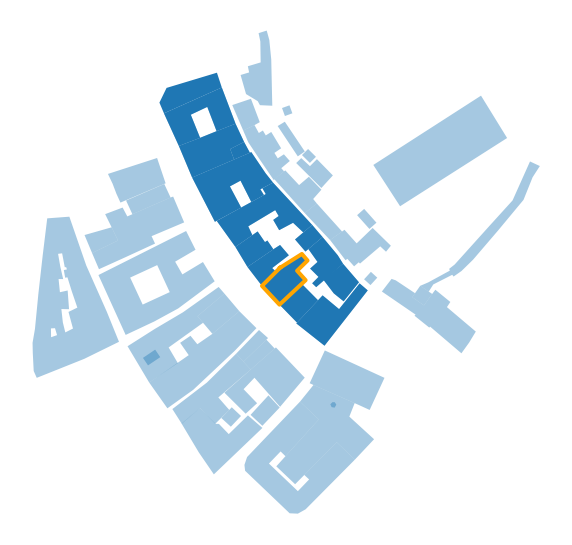

In [14]:
spatial_index = Udine_buildings.sindex

i = 23445

buffer = Udine_buildings['geometry'].centroid[i].buffer(100)
possible_matches_index = list(spatial_index.intersection(buffer.bounds))
possible_matches = Udine_buildings.loc[possible_matches_index] 
precise_matches = possible_matches[possible_matches.intersects(buffer)]

block = Udine_buildings.loc[Udine_buildings.loc[23445]['TouchesIndexes']]

# check sample
fig, ax = plt.subplots(figsize=(10,10))
precise_matches.plot(ax=ax, alpha = 0.4)
block.plot(ax=ax)
plt.plot(*Udine_buildings.loc[i]['geometry'].exterior.xy, color='orange',linewidth=4)
plt.axis('off')
plt.savefig(r'E:\Figures\distr.svg',dpi=400)